In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import time
import copy

In [2]:
commonGenes = pd.read_excel('files/common_genes.xlsx')
commonGenesArray = commonGenes.to_numpy()
commonGenes = []

for i in range(33):
    if commonGenesArray[i][0] != "TICAM2":
        commonGenes.append(commonGenesArray[i][0])

In [3]:
commonGenesH = ["AIP","LEP","CMGA","CDN2A","CAV1","CTNB1",
                "MDR1","CASR","ALBU","G6PD","FLNA","ESR1","KLOT",
                "ACTB","MEN1","P53","VGFR2","EGFR","CDN2B",
                "EDNRB","VDR","LEG3","LRP5","SYT1","AMPE","MK01",
                "CCND1","TNF10","PTHY","KAP0","S12A3","POTEF"] 
for i in range(32):
    commonGenesH[i] += "_HUMAN"

Prva funkcija ucitava mrezu.
Druga funkcija racuna znacajne metrike koriscenjem biblioteke networkx.

In [4]:
def load_network(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            node1, node2 = line.strip().split('\t-\t')
            G.add_edge(node1, node2)
    return G

def calculate_metrics(G, nodes_of_interest):
    start = time.time()
    
    degree_dict = dict(G.degree(nodes_of_interest))
    betweenness_dict = nx.betweenness_centrality(G, normalized=True)
    closeness_dict = nx.closeness_centrality(G)
    clustering_dict = nx.clustering(G)
    
    print(time.time()-start)
    
    metrics = {}
    for node in nodes_of_interest:
        metrics[node] = {
            'degree': degree_dict.get(node, 0),
            'betweenness_centrality': betweenness_dict.get(node, 0.0),
            'closeness_centrality': closeness_dict.get(node, 0.0),
            'clustering_coefficient': clustering_dict.get(node, 0.0)
        }
    
    return metrics


In [5]:
G = load_network('files/original_network.sif')

Racunaju se metrike. Bilo je potrebno 775 sekundi sto je otprilike 13 minuta.

In [6]:
metrics = calculate_metrics(G, commonGenesH)

775.1501967906952


In [67]:
new_metrics = {}
i = 0
for node in metrics:
    new_metrics[commonGenes[i] + " (" + node + ")"] = copy.deepcopy(metrics[node])
    i += 1

In [41]:
df = pd.DataFrame(new_metrics)
df = df.T
df = df.sort_index()
df

,degree,betweenness_centrality,closeness_centrality,clustering_coefficient
ABCB1 (MDR1_HUMAN),37.0,7.534547e-05,0.421603,0.048048
ACTB (ACTB_HUMAN),686.0,9.021660e-03,0.525869,0.062884
AIP (AIP_HUMAN),88.0,6.524666e-04,0.453495,0.074190
ALB (ALBU_HUMAN),275.0,4.809192e-03,0.488414,0.049025
CASR (CASR_HUMAN),21.0,1.494137e-05,0.376096,0.076190
CAV1 (CAV1_HUMAN),656.0,6.475427e-03,0.521396,0.064280
CCND1 (CCND1_HUMAN),245.0,8.052852e-04,0.491934,0.092974
CDKN2A (CDN2A_HUMAN),222.0,3.594818e-04,0.492458,0.145775
CDKN2B (CDN2B_HUMAN),70.0,7.530574e-05,0.447316,0.263354
CHGA (CMGA_HUMAN),13.0,3.523561e-06,0.388325,0.076923


Prikazujemo toplotnu mapu posrednistva, bliskosti i koeficijenta klasterovanja.

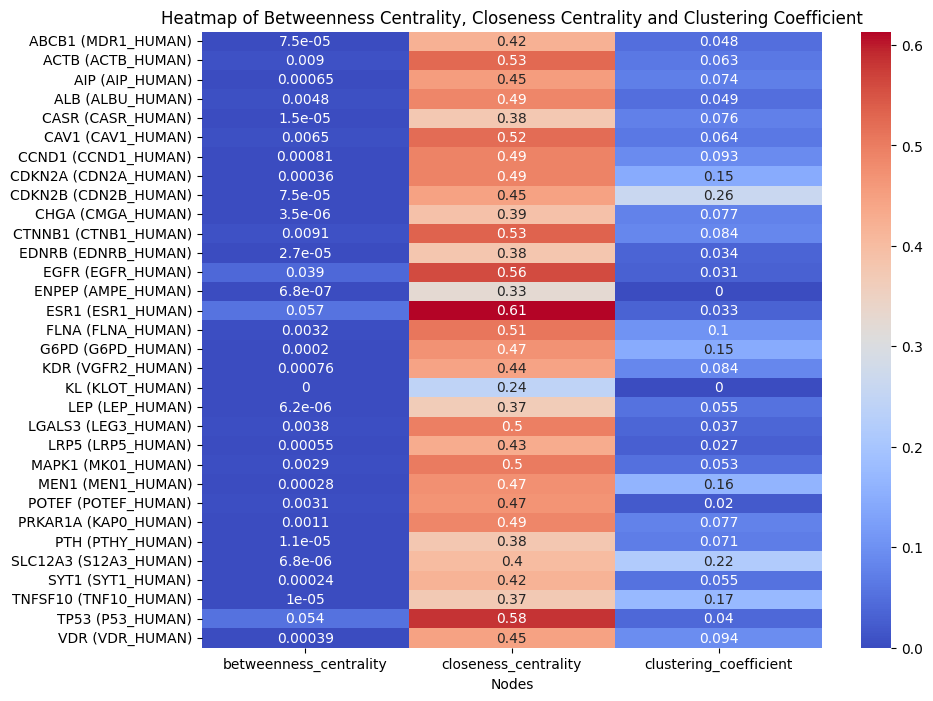

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['betweenness_centrality','closeness_centrality','clustering_coefficient']], cmap='coolwarm', annot=True, cbar=True)
plt.title('Heatmap of Betweenness Centrality, Closeness Centrality and Clustering Coefficient')
plt.xlabel('Nodes')
plt.savefig('Heatmap.png', bbox_inches='tight')
plt.show()

In [46]:
df['degree']

ABCB1 (MDR1_HUMAN)         37.0
ACTB (ACTB_HUMAN)         686.0
AIP (AIP_HUMAN)            88.0
ALB (ALBU_HUMAN)          275.0
CASR (CASR_HUMAN)          21.0
CAV1 (CAV1_HUMAN)         656.0
CCND1 (CCND1_HUMAN)       245.0
CDKN2A (CDN2A_HUMAN)      222.0
CDKN2B (CDN2B_HUMAN)       70.0
CHGA (CMGA_HUMAN)          13.0
CTNNB1 (CTNB1_HUMAN)      808.0
EDNRB (EDNRB_HUMAN)        34.0
EGFR (EGFR_HUMAN)        1359.0
ENPEP (AMPE_HUMAN)          5.0
ESR1 (ESR1_HUMAN)        2236.0
FLNA (FLNA_HUMAN)         420.0
G6PD (G6PD_HUMAN)         110.0
KDR (VGFR2_HUMAN)          79.0
KL (KLOT_HUMAN)             1.0
LEP (LEP_HUMAN)            11.0
LGALS3 (LEG3_HUMAN)       298.0
LRP5 (LRP5_HUMAN)          89.0
MAPK1 (MK01_HUMAN)        370.0
MEN1 (MEN1_HUMAN)         129.0
POTEF (POTEF_HUMAN)       207.0
PRKAR1A (KAP0_HUMAN)      195.0
PTH (PTHY_HUMAN)            8.0
SLC12A3 (S12A3_HUMAN)      20.0
SYT1 (SYT1_HUMAN)          72.0
TNFSF10 (TNF10_HUMAN)      22.0
TP53 (P53_HUMAN)         1789.0
VDR (VDR

Stepene cvorova prikazujemo u vidu stubicastog dijagrama.

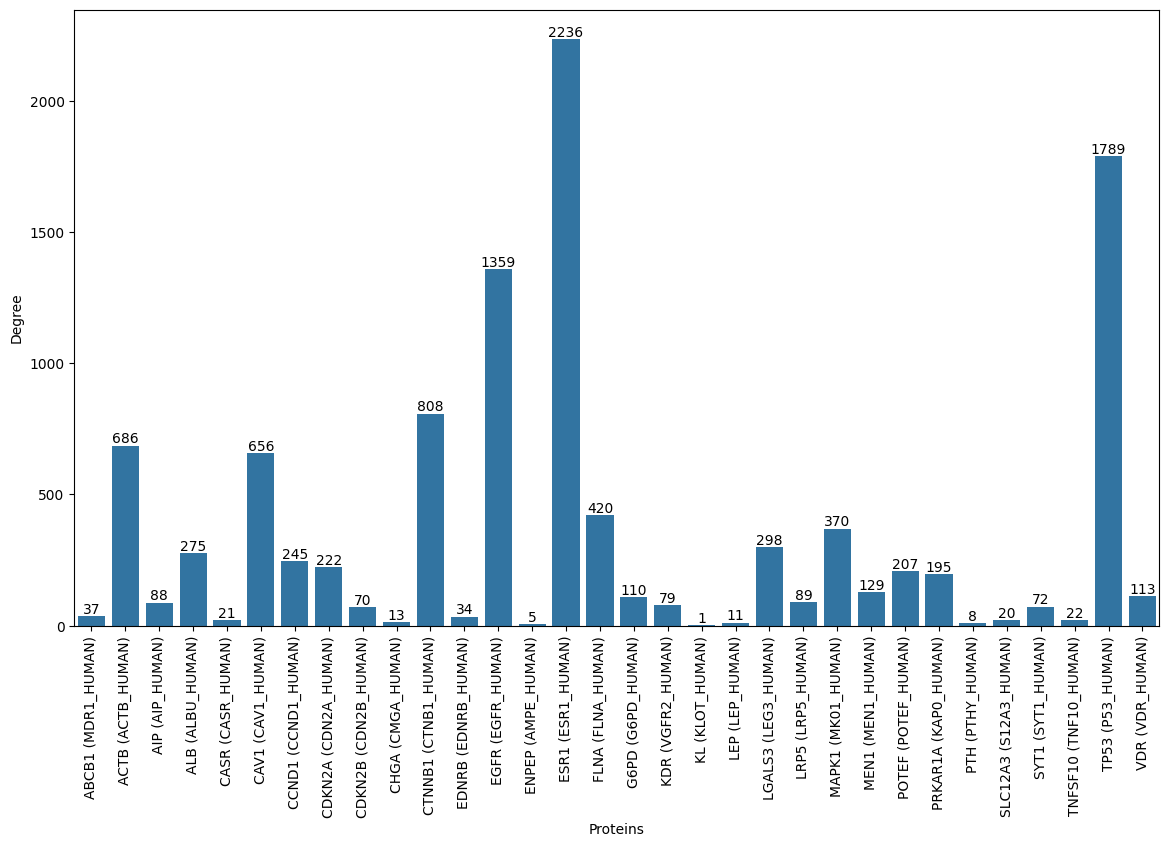

In [66]:
# Example DataFrame (replace this with your actual data)
data = {
    'Proteins': df.index,
    'Degree': df['degree'].to_numpy()
}

# Create a DataFrame
dfX = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Proteins', y='Degree', data=dfX)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Add integer labels on top of each bar
for index, row in df.iterrows():
    ax.text(index, row['degree'] + 10, f"{int(row['degree'])}", color='black', ha="center")

# Save and Show the plot
plt.savefig('Barplot.png', bbox_inches='tight')
plt.show()